# 모듈 및 데이터 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('galaxy.csv')

# 데이터 특성 확인하기

In [3]:
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1179 non-null   object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [5]:
data.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


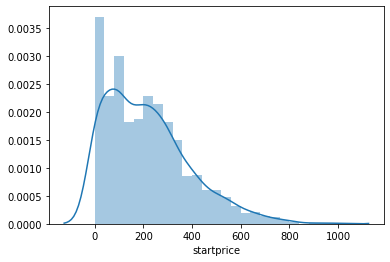

In [6]:
sns.distplot(data['startprice'])

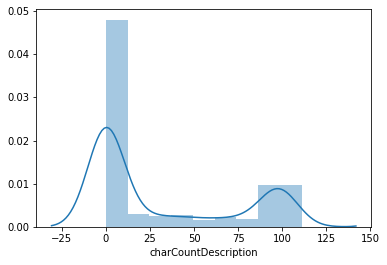

In [7]:
sns.distplot(data['charCountDescription'])

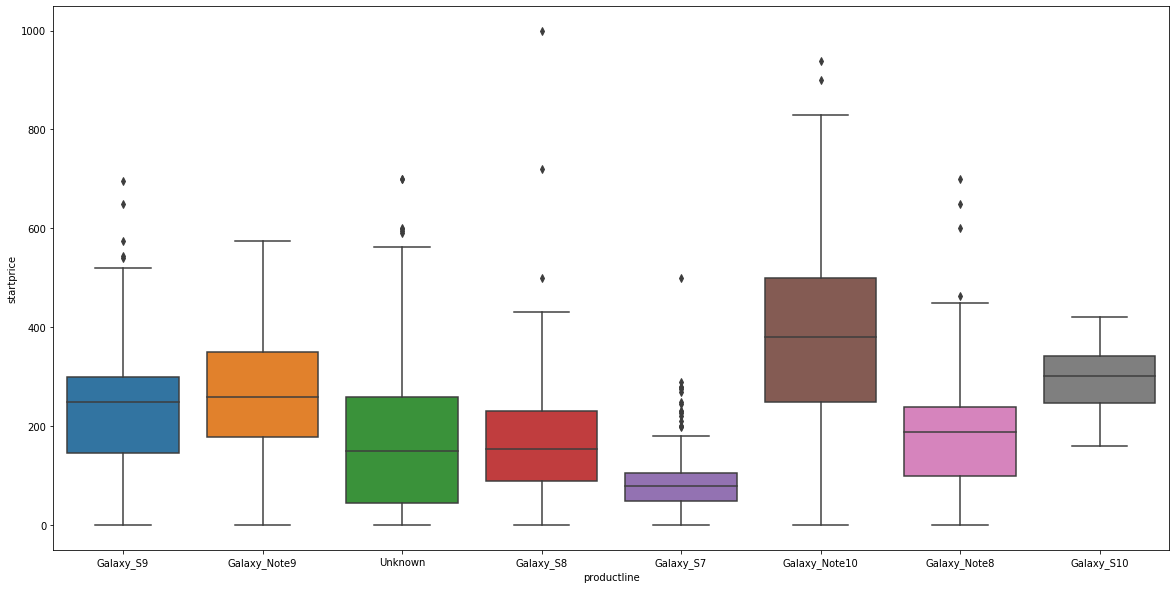

In [8]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='productline', y='startprice', data = data)

# Missing Value 처리

In [9]:
data.isna().sum() / len(data)

BuyItNow                0.000000
startprice              0.000000
carrier                 0.206061
color                   0.399327
productline             0.000000
noDescription           0.000000
charCountDescription    0.000000
upperCaseDescription    0.000000
sold                    0.000000
dtype: float64

In [10]:
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1


In [11]:
data = data.fillna('Unknown')

In [12]:
data

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,Unknown,Galaxy_Note9,contains description,0,0,0
2,0,199.99,Unknown,Unknown,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1
...,...,...,...,...,...,...,...,...,...
1480,0,89.50,AT&T,Unknown,Galaxy_S7,no description,96,2,0
1481,0,239.95,None,Midnight Black,Galaxy_S9,no description,97,5,1
1482,0,329.99,None,Space Gray,Galaxy_Note10,no description,93,1,0
1483,0,89.00,None,Midnight Black,Galaxy_S7,no description,92,2,1


In [13]:
data['carrier'].value_counts()

None               863
Unknown            306
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: carrier, dtype: int64

# 카테고리 변수 처리

In [14]:
data[['carrier','color','productline','noDescription']].nunique()

carrier          5
color            8
productline      8
noDescription    2
dtype: int64

In [15]:
data['carrier'].value_counts()

None               863
Unknown            306
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: carrier, dtype: int64

In [16]:
data['color'].value_counts()

Unknown           593
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: color, dtype: int64

In [17]:
data['productline'].value_counts()

Galaxy_Note10    351
Galaxy_S8        277
Galaxy_S7        227
Unknown          204
Galaxy_S9        158
Galaxy_Note8     153
Galaxy_Note9     107
Galaxy_S10         8
Name: productline, dtype: int64

In [18]:
data['noDescription'].value_counts()

contains description    856
no description          629
Name: noDescription, dtype: int64

In [19]:
# Black 종류를 하나로 통합시켜줄 함수 작성 (A)

def black(x):
    if x == 'Midnight Black':
        return 'Black'
    elif x == 'Aura Black':
        return 'Black'
    elif x == 'Prism Black':
        return 'Black'
    else:
        return x    

In [20]:
# Black 종류를 하나로 통합시켜줄 함수 작성 (B)

def black(x):
    if (x == 'Midnight Black') | (x == 'Aura Black') | (x == 'Prism Black'):        
        return 'Black'
    else:
        return x    

In [21]:
data['color'].apply(lambda x: black(x))

0            White
1          Unknown
2          Unknown
3       Space Gray
4       Space Gray
           ...    
1480       Unknown
1481         Black
1482    Space Gray
1483         Black
1484         Black
Name: color, Length: 1485, dtype: object

In [22]:
# Black 종류를 하나로 통합시켜줄 함수 작성 (C)

def black(x):
    if x in ['Midnight Black','Aura Black','Prism Black']:        
        return 'Black'
    else:
        return x    

In [23]:
data['color'] = data['color'].apply(lambda x: black(x))

In [24]:
data['color'].value_counts()

Unknown       593
Black         332
White         328
Space Gray    180
Gold           52
Name: color, dtype: int64

In [25]:
data = pd.get_dummies(data, columns = ['carrier', 'color', 'productline', 'noDescription'])

In [26]:
data

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold,carrier_AT&T,carrier_None,carrier_Sprint/T-Mobile,carrier_Unknown,carrier_Verizon,...,productline_Galaxy_Note10,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_contains description,noDescription_no description
0,0,199.99,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,235.00,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,199.99,100,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,1,175.00,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,100.00,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,89.50,96,2,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1481,0,239.95,97,5,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1482,0,329.99,93,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1483,0,89.00,92,2,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


# Decision Tree 모델 만들기

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = data.drop('sold', axis = 1)
y = data['sold']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
model = DecisionTreeClassifier(max_depth = 10)

In [32]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

# 예측

In [33]:
pred = model.predict(X_test)

In [34]:
y_test

258     1
57      0
225     1
704     0
1096    0
       ..
44      0
1399    1
1035    0
259     1
532     1
Name: sold, Length: 297, dtype: int64

# 평가

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
accuracy_score(y_test, pred)

0.7878787878787878

# 최적의 Max Depth 찾기 (파라미터 튜닝)

In [37]:
for i in range(2, 31):
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(i, round(accuracy_score(y_test, pred), 4))
    

2 0.8182
3 0.8316
4 0.8316
5 0.8249
6 0.8081
7 0.8182
8 0.7845
9 0.8114
10 0.7946
11 0.7946
12 0.7845
13 0.7542
14 0.771
15 0.7811
16 0.7677
17 0.7508
18 0.7407
19 0.7643
20 0.7609
21 0.7475
22 0.7508
23 0.7542
24 0.7407
25 0.7542
26 0.7643
27 0.7609
28 0.7475
29 0.7576
30 0.7508


#### 위의 For loop에 숫자를 2~30까지 집어넣었으므로, score에 들어있는 숫자는 i가 2,3,4,5,6,.. 일때 결과값. 
#### 즉, 최종적으로 얻은 score리스트에서 가장 큰 숫자가 index 1의 위치에 있다는것은 i가 3일 때를 의미함. 다시말해, i가 3일 때 가장 높은 스코어를 보여줌

# 최적의 Max Depth를 사용하여 다시 모델링하고 평가

In [38]:
model = DecisionTreeClassifier(max_depth = 3)

In [39]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [40]:
pred = model.predict(X_test)

In [41]:
accuracy_score(y_test, pred)

0.8316498316498316

In [42]:
confusion_matrix(y_test, pred)

array([[151,  10],
       [ 40,  96]], dtype=int64)

# Tree Plot 만들기

In [43]:
from sklearn.tree import plot_tree

[Text(558.0, 475.65000000000003, 'BuyItNow <= 0.5\n0.497\n1188\n[638, 550]'),
 Text(279.0, 339.75, 'startprice <= 208.495\n0.357\n659\n[506, 153]'),
 Text(139.5, 203.85000000000002, 'productline_Galaxy_S9 <= 0.5\n0.442\n240\n[161, 79]'),
 Text(69.75, 67.94999999999999, '\n  (...)  \n'),
 Text(209.25, 67.94999999999999, '\n  (...)  \n'),
 Text(418.5, 203.85000000000002, 'upperCaseDescription <= 5.5\n0.291\n419\n[345, 74]'),
 Text(348.75, 67.94999999999999, '\n  (...)  \n'),
 Text(488.25, 67.94999999999999, '\n  (...)  \n'),
 Text(837.0, 339.75, 'startprice <= 142.475\n0.375\n529\n[132, 397]'),
 Text(697.5, 203.85000000000002, 'startprice <= 59.995\n0.216\n332\n[41, 291]'),
 Text(627.75, 67.94999999999999, '\n  (...)  \n'),
 Text(767.25, 67.94999999999999, '\n  (...)  \n'),
 Text(976.5, 203.85000000000002, 'productline_Galaxy_Note10 <= 0.5\n0.497\n197\n[91, 106]'),
 Text(906.75, 67.94999999999999, '\n  (...)  \n'),
 Text(1046.25, 67.94999999999999, '\n  (...)  \n')]

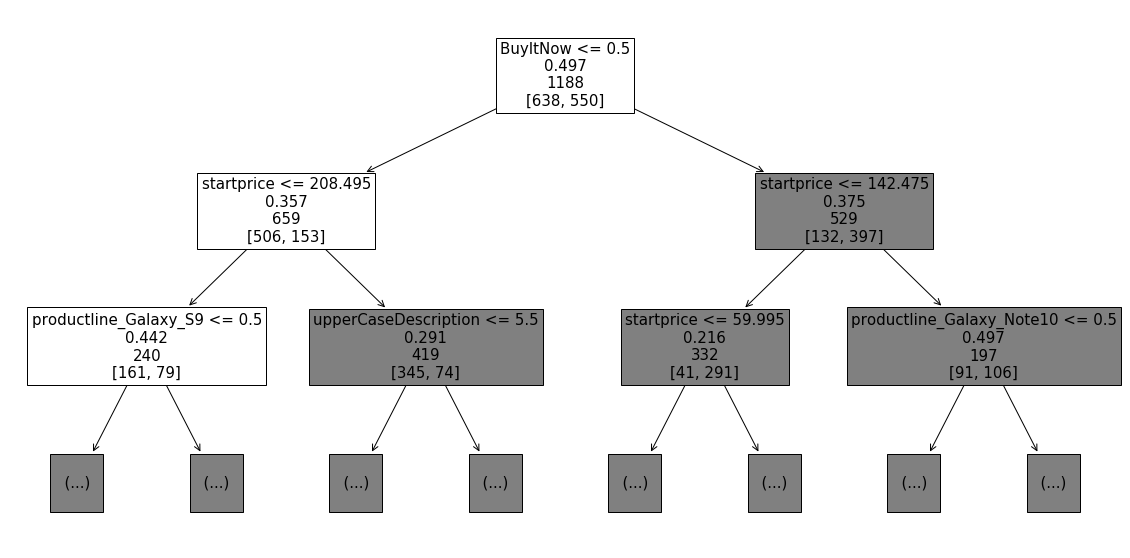

In [44]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X_train.columns, fontsize=15, label ="None", max_depth = 2)